In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('ortalama_alinmis.csv')
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df=df.set_index('date_time')
df['Date']=np.arange(len(df.index))
df=df.reset_index()

In [7]:
count(df.isnull())

NameError: name 'count' is not defined

In [3]:
cols = df.columns.to_list()
cols=cols[-1::2]+cols[1:-1]
df=df[cols]

In [22]:
df.to_csv('son.csv')

In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Looking at the features if all normally distributed

c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

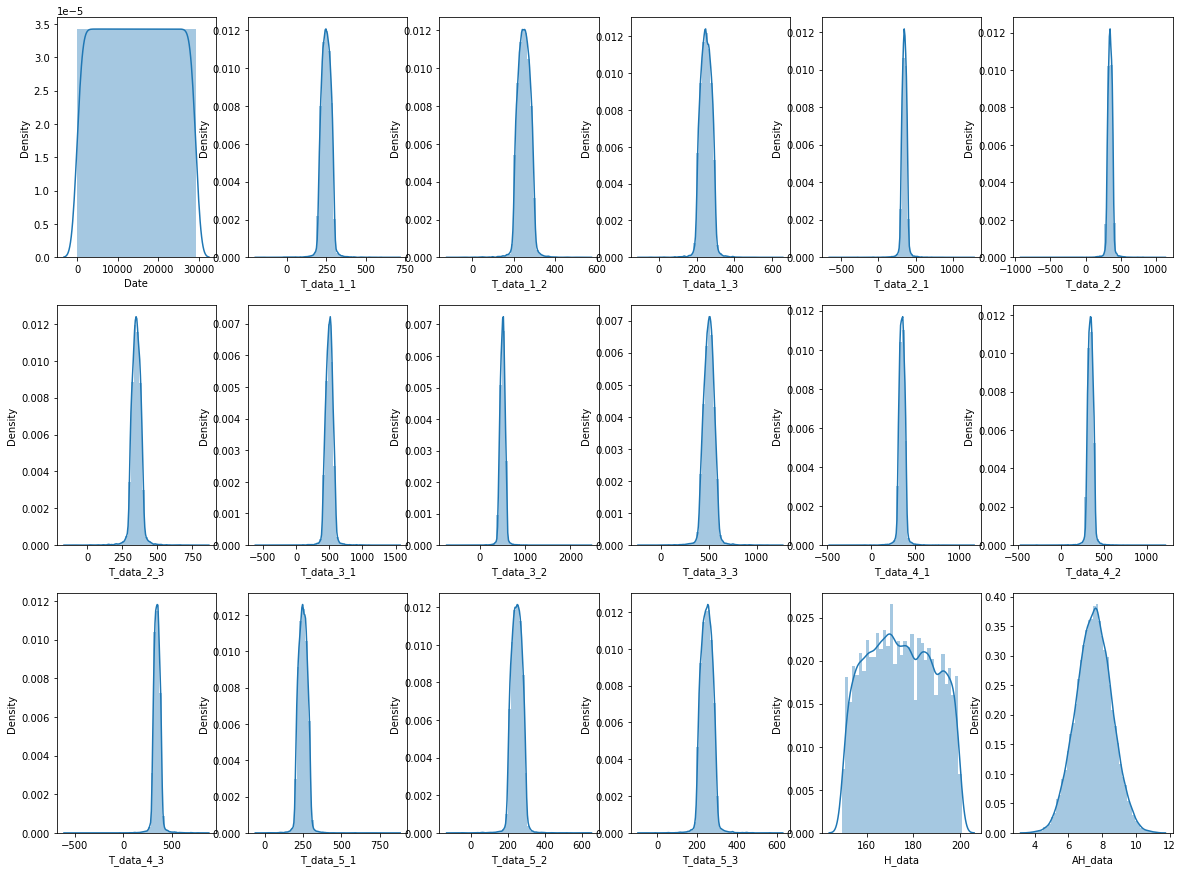

In [6]:
fig, axes=plt.subplots(3,6,figsize=(20,15))
for i,column in enumerate(X.columns):
    sns.distplot(X[column],ax=axes[i//6,i%6])

# Normalization

In [7]:
X['H_data']=X['H_data']/max(X['H_data'])
X['AH_data']=X['AH_data']/max(X['AH_data'])

In [10]:
X.iloc[:,1:-2]=(X.iloc[:,1:-2])/2500

In [20]:
X

,Date,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,0,0.108847,0.135080,0.107060,0.131093,0.131947,0.138380,0.200893,0.199813,0.237867,0.128360,0.145380,0.134567,0.092853,0.094567,0.096987,0.776866,0.440144
1,1,0.111060,0.117773,0.109407,0.128120,0.132720,0.142340,0.200593,0.200667,0.283340,0.132453,0.155467,0.134487,0.092827,0.095247,0.094187,0.780389,0.689336
2,2,0.108993,0.091427,0.106340,0.129267,0.133787,0.138040,0.200613,0.200073,0.223420,0.136980,0.159580,0.133640,0.095100,0.098587,0.093087,0.776725,0.615820
3,3,0.099447,0.091453,0.102253,0.130680,0.133247,0.126300,0.204967,0.199213,0.200147,0.137973,0.157647,0.132920,0.099993,0.101907,0.098153,0.778182,0.641157
4,4,0.095947,0.095773,0.099487,0.130187,0.129873,0.124527,0.209180,0.199687,0.215067,0.136540,0.151413,0.135453,0.104260,0.104373,0.099953,0.954884,0.632932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29180,29180,0.103340,0.102540,0.103720,0.150340,0.150087,0.145493,0.178787,0.174980,0.182767,0.143860,0.138187,0.139433,0.093093,0.101207,0.099633,0.775927,0.649971
29181,29181,0.103980,0.101700,0.103867,0.147253,0.143047,0.142607,0.170833,0.174193,0.179647,0.139267,0.140107,0.138567,0.097860,0.101873,0.098473,0.778271,0.691980
29182,29182,0.103387,0.101733,0.105200,0.143887,0.140053,0.140800,0.173447,0.173413,0.177287,0.139280,0.142007,0.137560,0.100347,0.104227,0.099120,0.778368,0.683387
29183,29183,0.101200,0.102433,0.102833,0.140987,0.140320,0.142267,0.177367,0.175467,0.175833,0.138980,0.140427,0.137513,0.102353,0.106887,0.098873,0.776553,0.765937


# BasicLinearRegression

In [12]:
from sklearn.linear_model import LinearRegression
basic_model=LinearRegression()

In [13]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=53)

In [15]:
basiclin_pred=basic_model.fit(X_train,y_train).predict(X_test)

# Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [17]:
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [18]:
##GridSearch
from sklearn.model_selection import GridSearchCV
param_grid={'polynomialfeatures__degree':np.arange(0,4),
            'linearregression__fit_intercept':[True,False],
            'linearregression__normalize':[True,False]}
grid=GridSearchCV(PolynomialRegression(),param_grid,cv=10)

In [19]:
grid.fit(X_train,y_train)

c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\sklearn\pipelin

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3])})

In [20]:
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 2}

In [21]:
pred_grid=grid.best_estimator_.predict(X_test)

In [22]:
degree=np.arange(1,4)

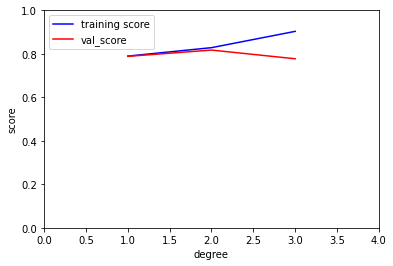

In [703]:
##Polynomial Regression more than 2 dimensions leads to overfitting
from sklearn.model_selection import validation_curve
degree=np.arange(1,4)
train_score,val_score=validation_curve(PolynomialRegression(),X_train,y_train,'polynomailfeatures__degree',degree,cv=10)
plt.plot(degree,np.median(train_score,1),color='blue',label='training score')
plt.plot(degree,np.median(val_score,1),color='red',label='val_score')
plt.legend(loc='best')
plt.xlim(1,3)
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score');

# Ridge Regression


In [704]:
from sklearn.linear_model import Ridge
model=Ridge()
param_grid={'alpha':[0.001,0.003,0.01,0.03,0.1,1,2,3,5,10,20,50],
            'copy_X':[True,False],
            'fit_intercept':[True,False],
            'normalize':[True,False]}
ridgegrid=GridSearchCV(model,param_grid,cv=10)
ridgegrid.fit(X_train,y_train)
    

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 1, 2, 3, 5,
                                   10, 20, 50],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [705]:
ridgegrid.best_params_

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [706]:
ridge_pred=ridgegrid.predict(X_test)

# Lasso Regression

In [707]:
from sklearn.linear_model import Lasso
lasso_model=Lasso()

In [708]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [709]:

param_grid={'alpha':[0.001,0.003,0.01,0.03,0.1,1,2,3,5,10,20,50],
            'copy_X':[True,False],
            'fit_intercept':[True,False],
            'normalize':[True,False]}
lassogrid=GridSearchCV(lasso_model,param_grid,cv=10)
lassogrid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 1, 2, 3, 5,
                                   10, 20, 50],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [710]:
lassogrid.best_params_

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [711]:
lasso_pred=lassogrid.predict(X_test)

# Performance Metrices


In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error


def get_score(pred):
    mse=mean_squared_error(y_test,pred)
    mae=mean_absolute_error(y_test,pred)
    mape=mean_absolute_percentage_error(y_test,pred)

    return print(f'mean_squared_error={mse}\nmean_absolute_error={mae}\nmean_absolute_percentage_error={mape}')

In [713]:

#BasicLinearRegression
get_score(basiclin_pred)

mean_squared_error=0.0009300370352345597
mean_absolute_error=0.01977279394860904
mean_absolute_percentage_error=0.023788383561624948


In [714]:
##GridSearchCV PolynomialRegression(2)
get_score(pred_grid)

mean_squared_error=0.0008164082085343398
mean_absolute_error=0.018030977325665165
mean_absolute_percentage_error=0.021634800530990785


In [715]:
##GridSearchCV Ridge
get_score(ridge_pred)

mean_squared_error=0.0009300089699329975
mean_absolute_error=0.01981533629712476
mean_absolute_percentage_error=0.023845878159031768


In [716]:
##GridSearchCV Lasso
get_score(lasso_pred)

mean_squared_error=0.0037402382281177243
mean_absolute_error=0.049655013684367214
mean_absolute_percentage_error=0.05958976235660677


# Cross Validation

In [24]:
##crossval basiclinear
from sklearn.model_selection import cross_val_score
scores=cross_val_score(basic_model,X_train,y_train,cv=10)
scores.mean()

0.7856739503197344

In [717]:
##crossval polynomial
from sklearn.model_selection import cross_val_score
scores=cross_val_score(grid.best_estimator_,X_train,y_train,cv=10)
scores.mean()

0.8072191057881183

In [719]:
##crossval ridge
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridgegrid.best_estimator_,X_train,y_train,cv=10)
scores.mean()

0.7857176348602088

In [720]:
##crossval lasso
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lassogrid.best_estimator_,X_train,y_train,cv=10)
scores.mean()

0.12037412921562791